The goal of working through this is to familiarize yourself with:


1. Writing and running code in google colab
2. Creating and manipulating pytorch tensors
3. Using PyTorch for computing derivatives
4. Implementing Gradient Descent

Note, google Colab notebooks provide a framework for writing and exploring python code, as well as writing up your own results and analysis, with built in support for math equations: $y = m * x + b$, $\text{Loss}(m,b) = \sum_{i = 1}^N ( m * x_i + b - y_i)^2$.

You can also run code - and importantly, code can be run in independent blocks that you can re-run and go back to, making coding and experimenting a much more dynamic process than just having to re-run an entire script from scratch.

In [1]:
x_values = [ i for i in range(10) ]

In [2]:
y_values = [ x**2 for x in x_values ]

In [3]:
print("X Values: ", x_values )
print("Corresponding Y Values: ", y_values )

X Values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Corresponding Y Values:  [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Note, variables are preserved across blocks. This is useful, but watch out!

In [4]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [5]:
i

9

Worth being aware of variable scope. This is always the case with python, this just makes it more of an issue.

Our main workhorse in this course will be PyTorch. PyTorch serves two main functions:
1. It gives us a framework for dealing with multi-dimensional numerical data (tensors). This is extremely similar to and portable with numpy.
2. It keeps track of calculations in a way that allows it to perform differentiation - allowing it to calculate complex (numerical) derivatives, which we can then use for optimization.

Note, this last part will be tremendously useful for Machine Learning - and indeed, PyTorch has a lot of built in tools for designing, training, and using neural networks. Fueled, at the core, by its ability to track and compute derivatives / gradients.

In [6]:
import torch

The main tool or data type that torch provides is a tensor, essentially a multi-dimensional array or matrix. These typically store the data that we will be working with, but to some extent there's little difference between them and a multi-dimensional array.

In [7]:
a = torch.tensor([ [1, 2, 3], [4, 5, 6]])

In [8]:
a

tensor([[1, 2, 3],
        [4, 5, 6]])

Notice: items in the most outside brackets is the first dimension.
Here, our first dimension contains two items: `[1,2,3]` and `[4,5,6]`

In [9]:
a.shape

torch.Size([2, 3])

For a given tensor, we can access its dimension or shape via variable.shape

In this case, a represents a 2-D tensor, where the first dimension (for visualization, the rows) has two elements, and the second dimension (for visualization, the columns) has three elements. But we can go larger.

In [10]:
b = torch.tensor( [ [ [ 1, 2 ], [3, 4] ], [ [5, 6 ], [7, 8 ] ], [ [9, 10], [11, 12]]])

In [11]:
b

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [12]:
b.shape

torch.Size([3, 2, 2])

Exercise: Manually construct a tensor with dimension `[2,4,3]`

Note as an example that a data set of 1000 color images (each 100 pixels by 100 pixels) might be represented by a tensor of shape [1000, 3, 100, 100] where data[i, 0, x, y] would represent the R-value of the pixel at position x,y in image i, data[i,1,x,y] the G-value, and data[i,2,x,y] the B-value.

General assumption for now, everything in a tensor will be of constant or fixed size - you wouldn't see a tensor with one row of length 10, and the next row of length 15. (These are jagged tensors, sometimes nested tensors.)

Manipulate the dimension order

Typical modalities here: we may load data from a file, or convert it from some other type. torch.tensor is a standard constructor for this. Other options might include generating values over a range (torch.arange) or generating random values. torch.randn draws numbers from a standard normal distribution (mean 0, variance 1).

In [13]:
torch.arange(0, 100)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
torch.randn( (3, 5, 5, 5) )

tensor([[[[-1.2172e+00,  2.0100e+00,  4.9477e-01, -7.8114e-01, -8.2324e-01],
          [ 8.5440e-01,  6.8561e-01,  8.3044e-01, -4.9543e-01, -1.8044e-01],
          [ 1.0929e+00, -2.2480e+00, -1.6877e+00, -1.4141e+00, -2.7961e-01],
          [-5.0919e-01,  1.0025e+00,  9.1768e-01,  3.1544e-01, -4.7857e-01],
          [-1.3499e+00, -9.6875e-01,  3.5796e-01,  2.5712e-02, -9.4855e-01]],

         [[ 1.7030e+00, -1.6237e+00, -2.0125e+00,  5.2607e-01, -9.4004e-01],
          [-1.2353e+00, -1.2266e+00,  8.1785e-01, -9.5706e-01,  8.6104e-01],
          [ 1.2641e+00,  4.6276e-01, -4.2417e-01, -1.0503e+00, -7.0279e-01],
          [-1.0988e+00, -1.8323e+00, -1.5104e+00,  1.2565e-01, -1.5270e+00],
          [ 3.1953e-02,  7.1599e-01,  9.3210e-01,  2.3690e-01,  2.3545e+00]],

         [[ 5.0445e-01, -6.7145e-01,  1.8042e+00, -1.4879e+00,  5.8830e-01],
          [ 1.3441e+00,  6.8752e-01, -2.2358e-01, -5.0911e-01,  7.7397e-01],
          [-3.0441e+00,  8.1429e-01, -5.0285e-02,  1.6165e+00,  1.3762e+

Obviously as the tensor becomes more complicated and larger, it will become more and more difficult to display.

There are two kinds of operations you should be aware of, for tensors:
1. Mathematical operations on the data within the tensors (like addition)
2. Structural operations on the tensors themselves (like gluing two tensors together into a larger tensor)

PyTorch supplies a wide variety of mathematical operations that can be applied to tensors.

In [15]:
a = torch.randn( [3] )

In [16]:
a

tensor([0.2644, 0.8506, 1.8124])

In [17]:
torch.abs( a )

tensor([0.2644, 0.8506, 1.8124])

In [18]:
torch.square( a )

tensor([0.0699, 0.7236, 3.2846])

In [19]:
torch.cos( a )

tensor([ 0.9652,  0.6595, -0.2392])

Frequently, calling a mathematical function with a tensor argument will apply the function across all elements of the tensor. Other mathematical functions might compute something over the entire tensor, like sums or averages.

In [20]:
torch.sum( a )

tensor(2.9274)

In [21]:
torch.mean( a )

tensor(0.9758)

In [22]:
torch.median( a )

tensor(0.8506)

Other tensor operations can combine multiple tensors. If a and b are tensors, a + b is interpreted as the element-wise sum of a and b.

In [23]:
a = torch.randn( [3] )
b = torch.randn( [3] )
print("a: ", a)
print("b: ", b)
print("a + b:", a + b)

a:  tensor([ 0.8041, -0.5143,  1.0913])
b:  tensor([-0.9496,  0.9189,  0.1082])
a + b: tensor([-0.1455,  0.4046,  1.1996])


*It's worth being aware of the fact that some operations will require your tensors to be the same size or dimension. If you are trying to add element-wise, and the two tensors have different shapes, this doesn't work!*

In [24]:
a = torch.randn([3])
b = torch.randn([5])
print("a:", a)
print("b:", b)
print("a + b:", a + b)

a: tensor([ 0.5800, -0.2652, -0.0162])
b: tensor([-0.0082,  1.2637, -0.8791, -0.7929, -0.8563])


RuntimeError: The size of tensor a (3) must match the size of tensor b (5) at non-singleton dimension 0

One exception to this rule is the idea of 'broadcasting'. Consider the following example:

In [25]:
a + 3

tensor([3.5800, 2.7348, 2.9838])

In this case, even though the addition doesn't make sense dimensionally, it can be interpreted as adding 3 to every element, which is what this operation does. Multiplication is similar.

In [26]:
2*a

tensor([ 1.1600, -0.5304, -0.0324])

One operation worth being aware of is multiplication: much like how a + b is done element-wise, multiplication is also:

In [27]:
a = torch.randn( [3] )
b = torch.randn( [3] )
print("a: ", a)
print("b: ", b)
print("a * b:", a * b)

a:  tensor([-1.8950,  0.9690,  1.6064])
b:  tensor([ 0.1378, -0.0331, -0.4608])
a * b: tensor([-0.2611, -0.0321, -0.7403])


This means for instance that we could perform the standard dot product operation in the following way

In [28]:
torch.sum( a * b )

tensor(-1.0335)

This extends to larger dimensions

In [29]:
a = torch.randn( [3,3] )
b = torch.randn( [3,3] )

print("a:", a)
print("b:", b)
print("a * b:", a*b)

a: tensor([[ 0.4358,  0.7699, -0.8193],
        [-1.1505, -0.4069, -1.3231],
        [-1.0966, -0.1088,  0.0610]])
b: tensor([[ 0.1544, -0.8335,  0.5606],
        [-0.5149, -0.2039, -0.2903],
        [-0.9138, -0.0305, -0.3062]])
a * b: tensor([[ 0.0673, -0.6417, -0.4593],
        [ 0.5924,  0.0830,  0.3841],
        [ 1.0020,  0.0033, -0.0187]])


One issue this creates though, we have to be careful any time we want to do 'actual' matrix multiplication. Fortunately, torch has us covered.

In [30]:
torch.matmul( a, b )

tensor([[ 0.4196, -0.4952,  0.2717],
        [ 1.2408,  1.0822, -0.1217],
        [-0.1691,  0.9343, -0.6019]])

In terms of structural operations, the three most important ones are going to be
1. indexing
2. slicing
3. reshaping

In [31]:
a[1,2]

tensor(-1.3231)

Values in a tensor can be read out via index exactly as you expect, where each specified index corresponds to the appropriate dimension in a.shape

Slicing takes this one step further. Suppose we had a large tensor, and we only wanted part of it - for instance the first row of b. We can use the colon operator to specify a range of indices, and take that 'slice' of the tensor

In [32]:
print("b:", b)
print("Second Row:", b[1, :]) # In this case, the colon takes the range of all possible indices in this second position
print("Second Col:", b[:, 1]) # In this case, the colon takes the range of all possible indices in this first position

b: tensor([[ 0.1544, -0.8335,  0.5606],
        [-0.5149, -0.2039, -0.2903],
        [-0.9138, -0.0305, -0.3062]])
Second Row: tensor([-0.5149, -0.2039, -0.2903])
Second Col: tensor([-0.8335, -0.2039, -0.0305])


Worth noting here that slicing in this way returned a 'row vector' in both cases, even when we wanted the column. In some cases, we may need to 'reshape' our tensor, or re-arrange it in a more useful format. We can do this by specifying the shape or dimension we want it to have.

In [33]:
a = torch.arange(0,21)

In [34]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])

In [35]:
a.reshape( 7, 3 )

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20]])

In [36]:
a.reshape( 3, 7 )

tensor([[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20]])

Question to consider: how is the data in the original tensor being distributed over the new tensor? What if I wanted something in higher dimensions, how would the data be distributed?

In [44]:
a = torch.arange(0,30)

In [39]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [41]:
a.reshape( 3,2,5 )

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]])

Other operations let us re-arrange data within a tensor. A classic matrix operation is transpose, swapping rows and cols.

In [45]:
a = torch.arange(0,21)

In [46]:
a = a.reshape( 3, 7 )

In [48]:
a

tensor([[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20]])

In [47]:
a.T

tensor([[ 0,  7, 14],
        [ 1,  8, 15],
        [ 2,  9, 16],
        [ 3, 10, 17],
        [ 4, 11, 18],
        [ 5, 12, 19],
        [ 6, 13, 20]])

Note: We could use slicing and indexing to potentially swap and move slices of data within a tensor as well. How could we swap the first and last rows above?

In [49]:
# Swap the first and last rows of tensor 'a'
a[[0, -1], :] = a[[-1, 0], :]
display(a)

tensor([[14, 15, 16, 17, 18, 19, 20],
        [ 7,  8,  9, 10, 11, 12, 13],
        [ 0,  1,  2,  3,  4,  5,  6]])

Let's try some other operations

1. Reverse the item order
2. Change the dimension order



In [53]:
a = torch.arange(0,21).reshape(3,7)

# Reverse the order items in the second dimension
display(a[:, torch.arange(a.size(1) - 1, -1, -1)])

# easier use
display(torch.flip(a, [1]))

# not supported in pyTorch
try:
  display(a[:, ::-1])
except Exception as e:
  print(e)

tensor([[ 6,  5,  4,  3,  2,  1,  0],
        [13, 12, 11, 10,  9,  8,  7],
        [20, 19, 18, 17, 16, 15, 14]])

tensor([[ 6,  5,  4,  3,  2,  1,  0],
        [13, 12, 11, 10,  9,  8,  7],
        [20, 19, 18, 17, 16, 15, 14]])

step must be greater than zero


In [92]:
# Create the input tensor
x = torch.arange(0, 30).reshape(2, 3, 5)
print("Original Tensor (shape {}):\n{}\n".format(x.shape, x))

# ----------------------------
# Method 1: permute
# ----------------------------
# Reorder dimensions from (2, 3, 5) → (5, 2, 3)
y_permute = x.permute(2, 0, 1)
print("After permute(2, 0, 1) (shape {}):\n{}\n".format(y_permute.shape, y_permute))

# ----------------------------
# Method 2: transpose
# ----------------------------
# Swap dimension 0 and 2 → (2, 3, 5) → (5, 3, 2)
y_transpose = x.transpose(0, 2)
print("After transpose(0, 2) (shape {}):\n{}\n".format(y_transpose.shape, y_transpose))

Original Tensor (shape torch.Size([2, 3, 5])):
tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]])

After permute(2, 0, 1) (shape torch.Size([5, 2, 3])):
tensor([[[ 0,  5, 10],
         [15, 20, 25]],

        [[ 1,  6, 11],
         [16, 21, 26]],

        [[ 2,  7, 12],
         [17, 22, 27]],

        [[ 3,  8, 13],
         [18, 23, 28]],

        [[ 4,  9, 14],
         [19, 24, 29]]])

After transpose(0, 2) (shape torch.Size([5, 3, 2])):
tensor([[[ 0, 15],
         [ 5, 20],
         [10, 25]],

        [[ 1, 16],
         [ 6, 21],
         [11, 26]],

        [[ 2, 17],
         [ 7, 22],
         [12, 27]],

        [[ 3, 18],
         [ 8, 23],
         [13, 28]],

        [[ 4, 19],
         [ 9, 24],
         [14, 29]]])



One of the most powerful things that pytorch can do is compute gradients and derivatives. It does this by keeping track of computions in a way that allows it to work backwards (via the chain rule) to compute derivatives.

In [59]:
x = torch.tensor( [2.1], requires_grad = True )

In [60]:
f_value = x**2 + 3*x - 4

In [61]:
f_value

tensor([6.7100], grad_fn=<SubBackward0>)

This tells us that our initial value, 2.1, plugged into the function x^2 + 3x - 4, gives us 6.71 as the final result. We can trigger differentiation with the .backward command

In [62]:
f_value.backward()

This causes pytorch to perform the differentiation of the indicated value with respect to any parameters that were used in its calculation - i.e., any tensors where requires_grad was set to True.

This derivative information is stored in x.grad

In [63]:
x.grad

tensor([7.2000])

This tells us that the derivative of the function with respect to the indicated value evaluates to 7.2

And we can check this ourself!

We know that if f(x) = x^2 + 3x - 4, then f'(x) = 2x + 3.

So f'(2.1) = 2*2.1 + 3 = 4.2 + 3 = 7.2

And, thankfully, pytorch is correct.

But we can also do higher dimensional derivatives as well. In this case, let's take x as a three dimensional vector x = (x1, x2, x3)

Let's compute the sum of the squares, f(x) = x1^2 + x2^2 + x3^2

In [64]:
x = torch.tensor( [3.1, -0.2, 1.7] , requires_grad = True )

In [65]:
f_value = torch.sum( torch.square( x ) )

In [66]:
f_value.backward()

Checking the gradient, we see a tensor with three values - these values correspond to the derivatives with respect to the corresponding values in the original tensor.

In [67]:
x.grad

tensor([ 6.2000, -0.4000,  3.4000])

To check this, note that in this case, df/dxi = 2*xi

And the result we got was exactly 2 * ( 3.1, -0.2, 1.7), i.e., exactly twice the original vector. All the derivatives are taken together as a single vector object.

Finally, an example with gradient descent.

Consider the function $f(x) = ( x^2 - 2 )^2$

Note that this function is non-negative, has a minimum value of zero, and achieves that minimum when $x = \pm \sqrt{2}$.

If we tried to minimize this function, this would give us a means of calculating the square root of 2.

So recall our standard approach:

*   Guess an initial x value
*   Compute f(x), f'(x)
*   Update x_new = x - alpha * f'(x)
*   Loop until convergence



In [68]:
x = torch.tensor( [ 1.0 ], requires_grad = True)
alpha = 0.1
print("Initial Guess:", x)
for i in range(20):
  f_value = ( x**2 - 2 )**2
  print("\t Current x value:", x.item(), "giving f value:", f_value.item())
  f_value.backward()
  with torch.no_grad(): # This tells pytorch we don't need to keep track of gradients for this calculation
    x -= alpha * x.grad # We update according to derivative descent
    x.grad = None # Delete the gradient information once used

print("Final x value:", x)
f_value = ( x**2 - 2 )**2
print("Final f value:", f_value)
f_value.backward()
print("Final Derivatives:", x.grad)

Initial Guess: tensor([1.], requires_grad=True)
	 Current x value: 1.0 giving f value: 1.0
	 Current x value: 1.399999976158142 giving f value: 0.0016000064788386226
	 Current x value: 1.4223999977111816 giving f value: 0.0005392488092184067
	 Current x value: 1.4091877937316895 giving f value: 0.00020134815713390708
	 Current x value: 1.4171861410140991 giving f value: 7.0840040280018e-05
	 Current x value: 1.4124149084091187 giving f value: 2.5848652512650006e-05
	 Current x value: 1.4152872562408447 giving f value: 9.22901563171763e-06
	 Current x value: 1.4135674238204956 giving f value: 3.3383703339495696e-06
	 Current x value: 1.4146004915237427 giving f value: 1.1981046554865316e-06
	 Current x value: 1.4139810800552368 giving f value: 4.3238310354354326e-07
	 Current x value: 1.4143530130386353 giving f value: 1.5550745047221426e-07
	 Current x value: 1.4141299724578857 giving f value: 5.588118767718697e-08
	 Current x value: 1.4142637252807617 giving f value: 2.012399136219755

Comparing this to the actual square root of 2, we see a good match.

In [69]:
torch.sqrt( torch.tensor( [2] ) )

tensor([1.4142])

And note that we can tell we are close to the solution, because the derivative is close to zero - as it should be at the minimum

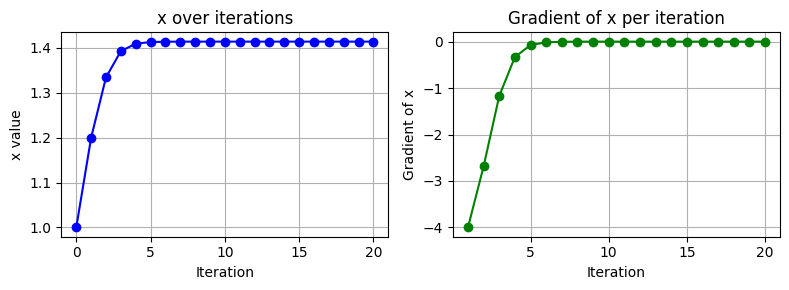

In [91]:
import matplotlib.pyplot as plt

# Setup
x = torch.tensor([1.0], requires_grad=True)
alpha = 0.05
steps = 20

x_values = [x.item()]
grad_values = []

for i in range(steps):
    f_value = (x**2 - 2)**2
    f_value.backward()

    # collect gradient before updating
    grad_values.append(x.grad.item())

    with torch.no_grad():
        x -= alpha * x.grad   # update
        x.grad = None         # ✅ reset gradient each step

    x_values.append(x.item())

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(8,3))

# Plot x
axes[0].plot(range(steps+1), x_values, marker='o', color='blue')
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("x value")
axes[0].set_title("x over iterations")
axes[0].grid(True)

# Plot gradient
axes[1].plot(range(1, steps+1), grad_values, marker='o', color='green')
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Gradient of x")
axes[1].set_title("Gradient of x per iteration")
axes[1].grid(True)

plt.tight_layout()
plt.show()

How gradient accumulation works in PyTorch

By design, **PyTorch accumulates gradients** into `.grad` instead of overwriting them.
That means after each call to:

```python
f_value.backward()
```

PyTorch **adds** the newly computed gradient to whatever is already stored in `x.grad`.



What happens in your loop if you don't clear it

Suppose the true gradient at step 1 is `g₁`, and at step 2 it is `g₂`.

* With clearing (`x.grad = None` each time):
  At step 2, you use exactly `g₂`.

* Without clearing:
  At step 2, `x.grad` will hold `g₁ + g₂`.
  At step 3, it will hold `g₁ + g₂ + g₃`, and so on.

So instead of doing **gradient descent**, you’d be updating with a **running sum of all previous gradients**.
That usually makes training blow up or behave very strangely.

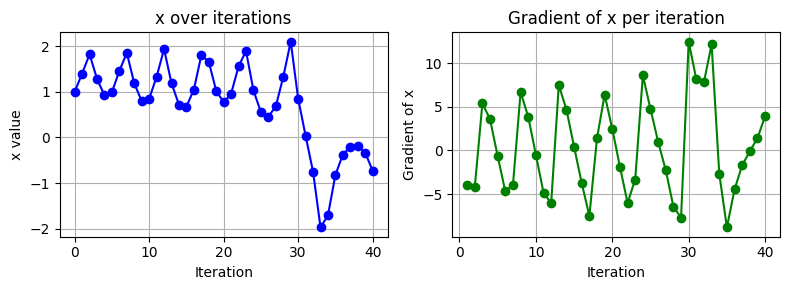

In [90]:
import matplotlib.pyplot as plt


# Setup
x = torch.tensor([1.0], requires_grad=True)
alpha = 0.1
steps = 40

x_values = [x.item()]
grad_values = []

for i in range(steps):
    f_value = (x**2 - 2)**2
    f_value.backward()

    # collect gradient before updating
    grad_values.append(x.grad.item())

    with torch.no_grad():
        # WRONG: we do NOT clear x.grad, so it accumulates
        x -= alpha * x.grad

    x_values.append(x.item())

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(8,3))

# Plot x
axes[0].plot(range(steps+1), x_values, marker='o', color='blue')
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("x value")
axes[0].set_title("x over iterations")
axes[0].grid(True)

# Plot gradient
axes[1].plot(range(1, steps+1), grad_values, marker='o', color='green')
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Gradient of x")
axes[1].set_title("Gradient of x per iteration")
axes[1].grid(True)

plt.tight_layout()
plt.show()